In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import os
!pip install wandb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.6/303.6 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.0 MB/s eta 0:00:00


In [3]:
from google.colab import files

# Upload the file from your local machine
uploaded = files.upload()


Saving utils.py to utils.py


In [4]:
import os

# List files in the current directory
print(os.listdir())

['.config', 'drive', 'utils.py', 'sample_data']


In [5]:
import utils


In [6]:
with open('utils.py', 'r') as file:
    print(file.read())

# -*- coding: utf-8 -*-
"""utils.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1Rr1FSkL9x2rEGugwJEUY8PXOHdFiUlSA
"""

import pandas as pd
import numpy as np
#import joblib
#import zipfile
#import os
import holidays

def break_datetime(df):
    df['utc_timestamp']= pd.to_datetime(df['utc_timestamp'])
    df[['year','weekofyear','dayofweek']]= np.uint16(df['utc_timestamp'].dt.isocalendar())
    df['month']= np.uint8(df['utc_timestamp'].dt.month)
    df['hour']= np.uint8(df['utc_timestamp'].dt.hour)
    df['minute'] = df['utc_timestamp'].dt.minute
    df['quarter'] = df['minute'] // 15 + 1
    df.drop(columns=['minute'], inplace=True)

    return df

def circular_encode(df, feature, max_value):
    df[feature+'_sin'] = np.sin(2 * np.pi * df[feature] / max_value)
    df[feature+'_cos']  = np.cos(2 * np.pi * df[feature] / max_value)
    return df

def apply_holidays(df):
    # Load holiday data for England
    england_holid

In [7]:
df2 = pd.read_csv('/content/drive/My Drive/internship/household_data_15min_singleindex.csv')
print(df2.head(20))

           utc_timestamp        cet_cest_timestamp  \
0   2014-12-11T17:45:00Z  2014-12-11T18:45:00+0100   
1   2014-12-11T18:00:00Z  2014-12-11T19:00:00+0100   
2   2014-12-11T18:15:00Z  2014-12-11T19:15:00+0100   
3   2014-12-11T18:30:00Z  2014-12-11T19:30:00+0100   
4   2014-12-11T18:45:00Z  2014-12-11T19:45:00+0100   
5   2014-12-11T19:00:00Z  2014-12-11T20:00:00+0100   
6   2014-12-11T19:15:00Z  2014-12-11T20:15:00+0100   
7   2014-12-11T19:30:00Z  2014-12-11T20:30:00+0100   
8   2014-12-11T19:45:00Z  2014-12-11T20:45:00+0100   
9   2014-12-11T20:00:00Z  2014-12-11T21:00:00+0100   
10  2014-12-11T20:15:00Z  2014-12-11T21:15:00+0100   
11  2014-12-11T20:30:00Z  2014-12-11T21:30:00+0100   
12  2014-12-11T20:45:00Z  2014-12-11T21:45:00+0100   
13  2014-12-11T21:00:00Z  2014-12-11T22:00:00+0100   
14  2014-12-11T21:15:00Z  2014-12-11T22:15:00+0100   
15  2014-12-11T21:30:00Z  2014-12-11T22:30:00+0100   
16  2014-12-11T21:45:00Z  2014-12-11T22:45:00+0100   
17  2014-12-11T22:00:00Z  20

In [8]:
df_consumption = df2.copy()
df_consumption = df_consumption.loc[:, ~df_consumption.columns.str.contains('charge|decharge|pv', case=False)]

In [9]:
df_consumption.head(20)

,utc_timestamp,cet_cest_timestamp,DE_KN_industrial1_grid_import,DE_KN_industrial2_grid_import,DE_KN_industrial3_area_offices,DE_KN_industrial3_area_room_1,DE_KN_industrial3_area_room_2,DE_KN_industrial3_area_room_3,DE_KN_industrial3_area_room_4,DE_KN_industrial3_compressor,...,DE_KN_residential5_grid_import,DE_KN_residential5_refrigerator,DE_KN_residential5_washing_machine,DE_KN_residential6_circulation_pump,DE_KN_residential6_dishwasher,DE_KN_residential6_freezer,DE_KN_residential6_grid_export,DE_KN_residential6_grid_import,DE_KN_residential6_washing_machine,interpolated
0,2014-12-11T17:45:00Z,2014-12-11T18:45:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-12-11T18:00:00Z,2014-12-11T19:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-12-11T18:15:00Z,2014-12-11T19:15:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-12-11T18:30:00Z,2014-12-11T19:30:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-11T18:45:00Z,2014-12-11T19:45:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2014-12-11T19:00:00Z,2014-12-11T20:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2014-12-11T19:15:00Z,2014-12-11T20:15:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2014-12-11T19:30:00Z,2014-12-11T20:30:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2014-12-11T19:45:00Z,2014-12-11T20:45:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2014-12-11T20:00:00Z,2014-12-11T21:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_consumption['utc_timestamp'] = pd.to_datetime(df_consumption['utc_timestamp'])
df_consumption['utc_timestamp'] = df_consumption['utc_timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')
df_consumption = utils.break_datetime(df_consumption)


In [11]:
df_consumption.head()

,utc_timestamp,cet_cest_timestamp,DE_KN_industrial1_grid_import,DE_KN_industrial2_grid_import,DE_KN_industrial3_area_offices,DE_KN_industrial3_area_room_1,DE_KN_industrial3_area_room_2,DE_KN_industrial3_area_room_3,DE_KN_industrial3_area_room_4,DE_KN_industrial3_compressor,...,DE_KN_residential6_grid_export,DE_KN_residential6_grid_import,DE_KN_residential6_washing_machine,interpolated,year,weekofyear,dayofweek,month,hour,quarter
0,2014-12-11 17:45:00,2014-12-11T18:45:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2014,50,4,12,17,4
1,2014-12-11 18:00:00,2014-12-11T19:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2014,50,4,12,18,1
2,2014-12-11 18:15:00,2014-12-11T19:15:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2014,50,4,12,18,2
3,2014-12-11 18:30:00,2014-12-11T19:30:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2014,50,4,12,18,3
4,2014-12-11 18:45:00,2014-12-11T19:45:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2014,50,4,12,18,4


In [12]:
drive_path = '/content/drive/My Drive/internship'  # Adjust this path as needed

file_path1 = os.path.join(drive_path, 'df_ref2.csv')

In [13]:
df_ref2 = df_consumption.copy()
df_ref2 = df_ref2.loc[:, df_ref2.columns.str.contains('refrigerator|timestamp', case=False, regex=True)]
df_ref2 = utils.break_datetime(df_ref2)
df_ref2.head(20)

,utc_timestamp,cet_cest_timestamp,DE_KN_industrial3_refrigerator,DE_KN_residential3_refrigerator,DE_KN_residential4_refrigerator,DE_KN_residential5_refrigerator,year,weekofyear,dayofweek,month,hour,quarter
0,2014-12-11 17:45:00,2014-12-11T18:45:00+0100,NaN,NaN,NaN,NaN,2014,50,4,12,17,4
1,2014-12-11 18:00:00,2014-12-11T19:00:00+0100,NaN,NaN,NaN,NaN,2014,50,4,12,18,1
2,2014-12-11 18:15:00,2014-12-11T19:15:00+0100,NaN,NaN,NaN,NaN,2014,50,4,12,18,2
3,2014-12-11 18:30:00,2014-12-11T19:30:00+0100,NaN,NaN,NaN,NaN,2014,50,4,12,18,3
4,2014-12-11 18:45:00,2014-12-11T19:45:00+0100,NaN,NaN,NaN,NaN,2014,50,4,12,18,4
5,2014-12-11 19:00:00,2014-12-11T20:00:00+0100,NaN,NaN,NaN,NaN,2014,50,4,12,19,1
6,2014-12-11 19:15:00,2014-12-11T20:15:00+0100,NaN,NaN,NaN,NaN,2014,50,4,12,19,2
7,2014-12-11 19:30:00,2014-12-11T20:30:00+0100,NaN,NaN,NaN,NaN,2014,50,4,12,19,3
8,2014-12-11 19:45:00,2014-12-11T20:45:00+0100,NaN,NaN,NaN,NaN,2014,50,4,12,19,4
9,2014-12-11 20:00:00,2014-12-11T21:00:00+0100,NaN,NaN,NaN,NaN,2014,50,4,12,20,1


In [14]:
df_ref2.to_csv(file_path1, index=False)

In [15]:
columns_to_process_ref = [
    'DE_KN_industrial3_refrigerator',
    'DE_KN_residential3_refrigerator',
    'DE_KN_residential4_refrigerator',
    'DE_KN_residential5_refrigerator'
]

for column in columns_to_process_ref:
    if column in df_ref2.columns:
        # Create a temporary DataFrame for the current column
        temp_df = df_ref2[['utc_timestamp', column]].dropna().copy()

        # Calculate daily values
        temp_df['daily_' + column] = temp_df[column].diff()

        # Handle the first daily value
        temp_df.loc[temp_df.index[0], 'daily_' + column] = temp_df.loc[temp_df.index[0], column]

        # Merge the new daily values back into the original DataFrame
        df_ref2 = df_ref2.merge(temp_df[['utc_timestamp', 'daily_' + column]], on='utc_timestamp')



print(df_ref2)

            utc_timestamp        cet_cest_timestamp  \
0     2015-10-26 11:30:00  2015-10-26T12:30:00+0100   
1     2015-10-26 11:45:00  2015-10-26T12:45:00+0100   
2     2015-10-26 12:00:00  2015-10-26T13:00:00+0100   
3     2015-10-26 12:15:00  2015-10-26T13:15:00+0100   
4     2015-10-26 12:30:00  2015-10-26T13:30:00+0100   
...                   ...                       ...   
41885 2017-01-04 18:45:00  2017-01-04T19:45:00+0100   
41886 2017-01-04 19:00:00  2017-01-04T20:00:00+0100   
41887 2017-01-04 19:15:00  2017-01-04T20:15:00+0100   
41888 2017-01-04 19:30:00  2017-01-04T20:30:00+0100   
41889 2017-01-04 19:45:00  2017-01-04T20:45:00+0100   

       DE_KN_industrial3_refrigerator  DE_KN_residential3_refrigerator  \
0                               4.928                          127.624   
1                               4.933                          127.631   
2                               4.955                          127.644   
3                               4.965      

In [16]:
from sklearn.preprocessing import StandardScaler

'''df_ref2['daily_DE_KN_industrial3_refrigerator']=np.log1p(df_ref2['daily_DE_KN_industrial3_refrigerator'])
df_ref2['daily_DE_KN_residential3_refrigerator']=np.log1p(df_ref2['daily_DE_KN_residential3_refrigerator'])
df_ref2['daily_DE_KN_residential4_refrigerator']=np.log1p(df_ref2['daily_DE_KN_residential4_refrigerator'])
df_ref2['daily_DE_KN_residential5_refrigerator']=np.log1p(df_ref2['daily_DE_KN_residential5_refrigerator'])'''


columns_to_scale = ['daily_DE_KN_industrial3_refrigerator','daily_DE_KN_residential3_refrigerator',
                    'daily_DE_KN_residential4_refrigerator','daily_DE_KN_residential5_refrigerator']


columns_for_pred = df_ref2[columns_to_scale]
columns_not_scaled = df_ref2.drop(columns=columns_to_scale)

df_ref2.head()

,utc_timestamp,cet_cest_timestamp,DE_KN_industrial3_refrigerator,DE_KN_residential3_refrigerator,DE_KN_residential4_refrigerator,DE_KN_residential5_refrigerator,year,weekofyear,dayofweek,month,hour,quarter,daily_DE_KN_industrial3_refrigerator,daily_DE_KN_residential3_refrigerator,daily_DE_KN_residential4_refrigerator,daily_DE_KN_residential5_refrigerator
0,2015-10-26 11:30:00,2015-10-26T12:30:00+0100,4.928,127.624,4.474,0.000,2015,44,1,10,11,3,0.001,0.001,0.0,0.000
1,2015-10-26 11:45:00,2015-10-26T12:45:00+0100,4.933,127.631,4.474,0.000,2015,44,1,10,11,4,0.005,0.007,0.0,0.000
2,2015-10-26 12:00:00,2015-10-26T13:00:00+0100,4.955,127.644,4.474,0.001,2015,44,1,10,12,1,0.022,0.013,0.0,0.001
3,2015-10-26 12:15:00,2015-10-26T13:15:00+0100,4.965,127.654,4.474,0.019,2015,44,1,10,12,2,0.010,0.010,0.0,0.018
4,2015-10-26 12:30:00,2015-10-26T13:30:00+0100,4.966,127.654,4.474,0.048,2015,44,1,10,12,3,0.001,0.000,0.0,0.029


In [17]:
# Scaling the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(columns_for_pred)

# Convert back to DataFrame for easier handling
df_scaled = pd.DataFrame(df_scaled, index=df_ref2.index, columns=columns_to_scale)

df_scaled.head()

,daily_DE_KN_industrial3_refrigerator,daily_DE_KN_residential3_refrigerator,daily_DE_KN_residential4_refrigerator,daily_DE_KN_residential5_refrigerator
0,-0.995793,-0.961843,-0.71016,-1.122680
1,-0.499619,0.154665,-0.71016,-1.122680
2,1.609124,1.271172,-0.71016,-1.013995
3,0.120600,0.712919,-0.71016,0.833649
4,-0.995793,-1.147927,-0.71016,2.029184


In [34]:
# Combine the scaled columns with the original 'utc_timestamp' column
df_final = pd.concat([df_ref2[['utc_timestamp','year','weekofyear','dayofweek','month','hour','quarter']], df_scaled], axis=1)

In [35]:
df_final.head()

,utc_timestamp,year,weekofyear,dayofweek,month,hour,quarter,daily_DE_KN_industrial3_refrigerator,daily_DE_KN_residential3_refrigerator,daily_DE_KN_residential4_refrigerator,daily_DE_KN_residential5_refrigerator
0,2015-10-26 11:30:00,2015,44,1,10,11,3,-0.995793,-0.961843,-0.71016,-1.122680
1,2015-10-26 11:45:00,2015,44,1,10,11,4,-0.499619,0.154665,-0.71016,-1.122680
2,2015-10-26 12:00:00,2015,44,1,10,12,1,1.609124,1.271172,-0.71016,-1.013995
3,2015-10-26 12:15:00,2015,44,1,10,12,2,0.120600,0.712919,-0.71016,0.833649
4,2015-10-26 12:30:00,2015,44,1,10,12,3,-0.995793,-1.147927,-0.71016,2.029184


In [36]:
#df_ref2= df_ref2.drop(columns = ['DE_KN_industrial3_refrigerator','DE_KN_residential3_refrigerator','DE_KN_residential4_refrigerator','DE_KN_residential5_refrigerator'], axis = 1)

In [37]:
#df_ref2.head()

In [38]:
drive_path = '/content/drive/My Drive/internship'  # Adjust this path as needed

file_path2 = os.path.join(drive_path, 'dfr2.csv')

In [39]:
dfr2 = df_final.copy()
dfr2.to_csv(file_path2, index=False)

In [40]:
df = pd.read_csv('/content/drive/My Drive/internship/dfr2.csv')
# Convert timestamps to datetime format
df['utc_timestamp'] = pd.to_datetime(df['utc_timestamp'])
df.set_index('utc_timestamp', inplace=True)

In [41]:
df.head()

,year,weekofyear,dayofweek,month,hour,quarter,daily_DE_KN_industrial3_refrigerator,daily_DE_KN_residential3_refrigerator,daily_DE_KN_residential4_refrigerator,daily_DE_KN_residential5_refrigerator
utc_timestamp,,,,,,,,,,
2015-10-26 11:30:00,2015,44,1,10,11,3,-0.995793,-0.961843,-0.71016,-1.122680
2015-10-26 11:45:00,2015,44,1,10,11,4,-0.499619,0.154665,-0.71016,-1.122680
2015-10-26 12:00:00,2015,44,1,10,12,1,1.609124,1.271172,-0.71016,-1.013995
2015-10-26 12:15:00,2015,44,1,10,12,2,0.120600,0.712919,-0.71016,0.833649
2015-10-26 12:30:00,2015,44,1,10,12,3,-0.995793,-1.147927,-0.71016,2.029184


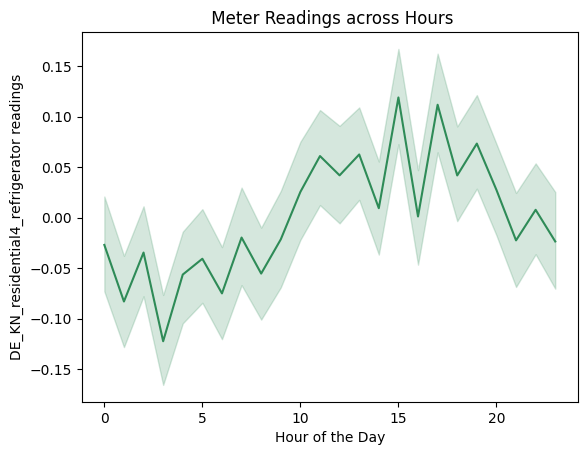

In [42]:
import seaborn as sns


sns.lineplot(x=df['hour'], y=df['daily_DE_KN_residential4_refrigerator'], color='seagreen')

# Set labels and title
plt.ylabel("DE_KN_residential4_refrigerator readings")
plt.xlabel("Hour of the Day")
plt.title(" Meter Readings across Hours")

# Show the plot
plt.show()

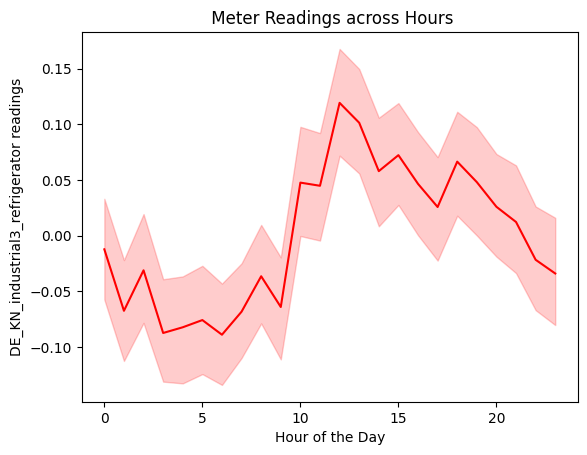

In [43]:
import seaborn as sns


sns.lineplot(x=df['hour'], y=df['daily_DE_KN_industrial3_refrigerator'], color='red')

# Set labels and title
plt.ylabel("DE_KN_industrial3_refrigerator readings")
plt.xlabel("Hour of the Day")
plt.title(" Meter Readings across Hours")

# Show the plot
plt.show()

In [49]:
df1 = df.drop(axis=1, columns=['year',	'weekofyear',	'dayofweek', 	'month', 	'hour','quarter','daily_DE_KN_residential3_refrigerator'	,'daily_DE_KN_residential4_refrigerator','daily_DE_KN_residential5_refrigerator'])
df1.head()

,daily_DE_KN_industrial3_refrigerator
utc_timestamp,
2015-10-26 11:30:00,-0.995793
2015-10-26 11:45:00,-0.499619
2015-10-26 12:00:00,1.609124
2015-10-26 12:15:00,0.120600
2015-10-26 12:30:00,-0.995793


In [50]:
# Function to get the timestamps for the previous and next two days at the same time
def get_surrounding_timestamps(base_timestamp):
    base_date = datetime.strptime(base_timestamp, "%Y-%m-%d %H:%M:%S")
    surrounding_dates = [base_date + timedelta(days=offset) for offset in [-2, -1, 1, 2]]
    return [date.strftime("%Y-%m-%d %H:%M:%S") for date in surrounding_dates]

# Get the surrounding timestamps
timestamps_14 = get_surrounding_timestamps("2015-10-28 11:30:00")
timestamps_15 = get_surrounding_timestamps("2015-10-28 11:45:00")

# Calculate the averages
average_14 = df1.loc[timestamps_14, 'daily_DE_KN_industrial3_refrigerator'].mean()
average_15 = df1.loc[timestamps_15, 'daily_DE_KN_industrial3_refrigerator'].mean()

# Replace the values in the dataset
df1.at['2015-10-28 11:30:00', 'daily_DE_KN_industrial3_refrigerator'] = average_14
df1.at['2015-10-28 11:45:00', 'daily_DE_KN_industrial3_refrigerator'] = average_15

In [51]:
last_timestamp = df.index.max()
two_months_ago = last_timestamp - timedelta(days=60)

# Filter the data for the last two months
last_two_months = df[two_months_ago:]

In [52]:
import wandb
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_percentage_error,mean_absolute_error

In [53]:
wandb.init(project='SMA3_v2', entity='tuncayezgi')

# Define a range of window sizes to test
window_sizes = range(1,2388)
min_mse = float('inf')
optimal_window_size = None

for window_size in window_sizes:
    # Calculate the moving average using the specified window size
    ma_prediction = df1.loc[:two_months_ago, 'daily_DE_KN_industrial3_refrigerator'].rolling(window=window_size, min_periods=1).mean().iloc[-1]

    # Use this prediction for the last two months
    predicted_values = np.full_like(last_two_months['daily_DE_KN_industrial3_refrigerator'], ma_prediction)

    # Calculate metrics for the last two months
    mae = mean_absolute_error(last_two_months['daily_DE_KN_industrial3_refrigerator'], predicted_values)
    mse = mean_squared_error(last_two_months['daily_DE_KN_industrial3_refrigerator'], predicted_values)
    mape = np.mean(np.abs((last_two_months['daily_DE_KN_industrial3_refrigerator'] - predicted_values) / last_two_months['daily_DE_KN_industrial3_refrigerator'])) * 100
    r2 = r2_score(last_two_months['daily_DE_KN_industrial3_refrigerator'], predicted_values)

    if mse < min_mse:
        min_mse = mse
        optimal_window_size = window_size
    # Log metrics to WandB for each window size
    wandb.log({'window_size': window_size, 'MAE': mae, 'MSE': mse, 'MAPE': mape, 'R2': r2})


wandb.log({'optimal_window_size': optimal_window_size, 'minimum_mse': min_mse})
# Close the WandB run
wandb.finish()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


MAE,█▇▂▂▂▂▂▃▃▂▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▂▂▂▂▂▂
MAPE,█▇▂▂▂▂▂▃▃▂▃▃▃▃▃▃▃▃▂▂▂▂▂▃▃▂▂▂▂▁▁▁▁▁▂▂▂▂▂▂
MSE,█▇▂▂▂▂▂▃▂▂▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▂▂▂▂▂
R2,▁▂▇▇▇▇▇▆▇▇▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇██████▇▇▇▇▇
minimum_mse,▁
optimal_window_size,▁
window_size,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
MAE,1.0252
MAPE,169.34906
MSE,1.14676
R2,-0.24197


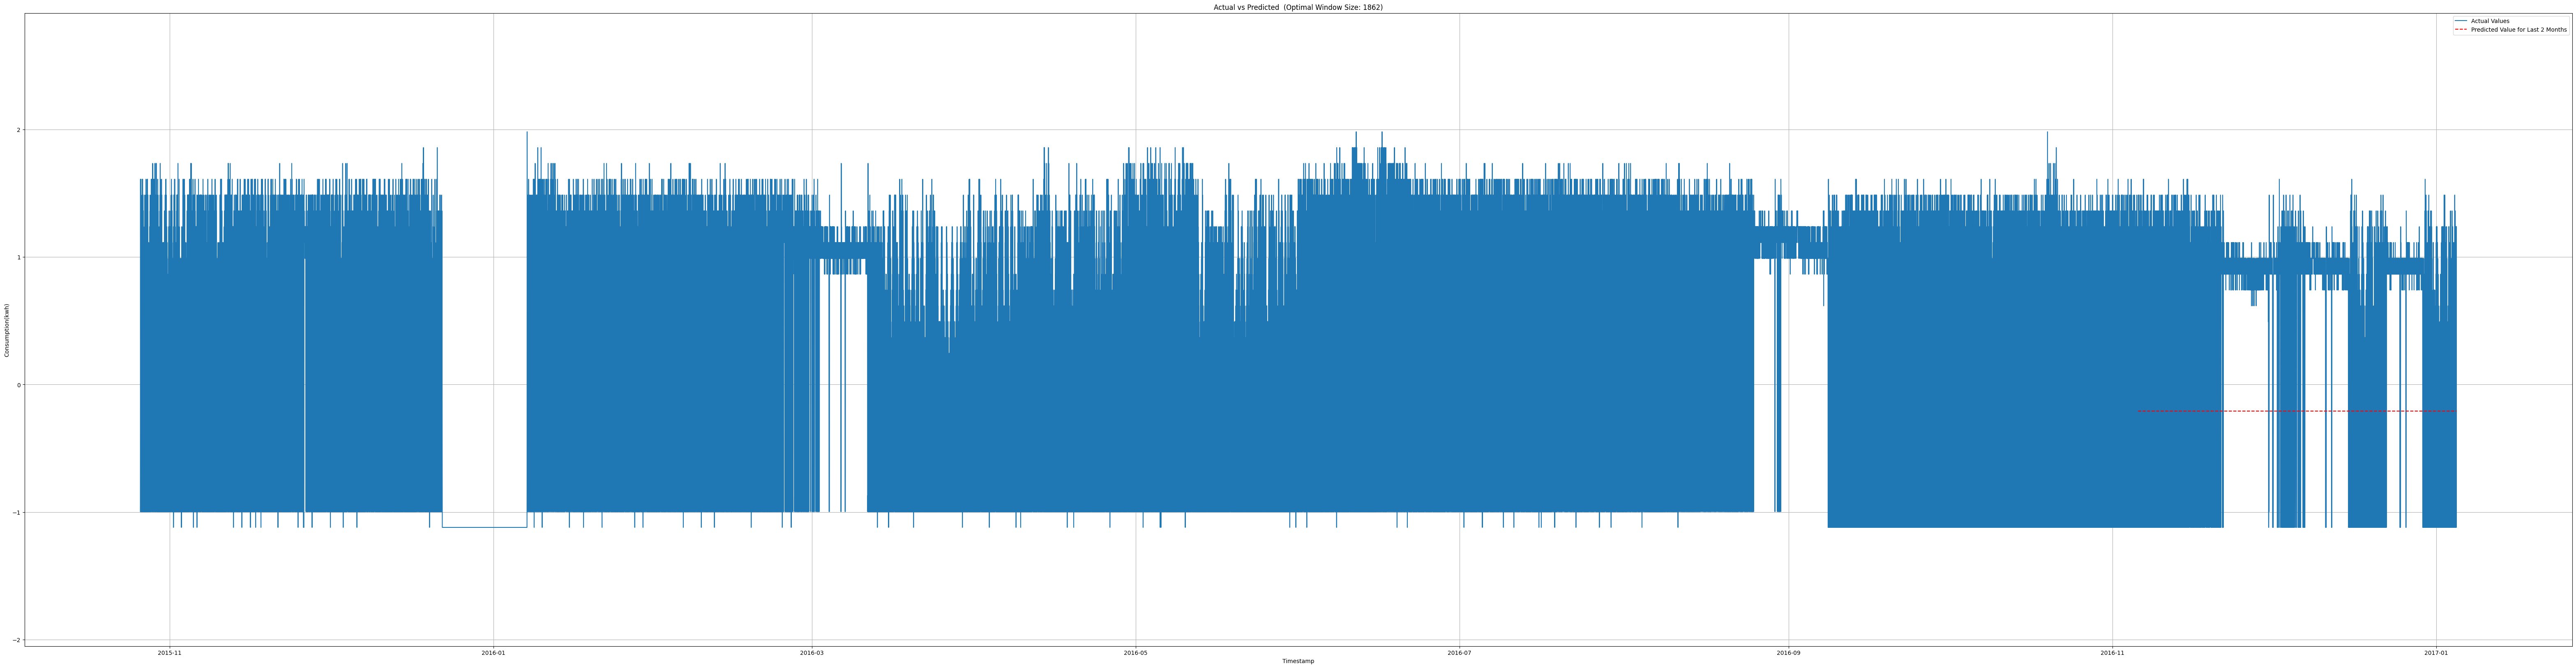

In [54]:
# Assuming 'data6' is the DataFrame we are working with
# Calculate the moving average using the optimal window size
optimal_ma_prediction = df1.loc[:two_months_ago, 'daily_DE_KN_industrial3_refrigerator'].rolling(window=optimal_window_size, min_periods=1).mean().iloc[-1]

# Determine the range for 'log_meter_reading' in data6
reading_min = df1['daily_DE_KN_industrial3_refrigerator'].min()
reading_max = df1['daily_DE_KN_industrial3_refrigerator'].max()
padding = (reading_max - reading_min) * 0.3  # 10% padding on each side

# Plotting
plt.figure(figsize=(80, 20))

# Plot the actual values for the entire period from data6
plt.plot(df1.index, df1['daily_DE_KN_industrial3_refrigerator'], label='Actual Values')

# Plot the predicted value line only for the last two months
plt.hlines(y=optimal_ma_prediction, xmin=last_two_months.index[0], xmax=last_two_months.index[-1], colors='r', linestyles='--', label='Predicted Value for Last 2 Months')

plt.title(f'Actual vs Predicted  (Optimal Window Size: {optimal_window_size})')
plt.xlabel('Timestamp')
plt.ylabel('Consumption(kwh)')

# Set the y-axis limits
plt.ylim(reading_min - padding, reading_max + padding)

plt.legend()
plt.grid(True)
plt.show()

In [55]:
df2 = df.drop(axis=1, columns=['daily_DE_KN_industrial3_refrigerator'	,'daily_DE_KN_residential4_refrigerator','daily_DE_KN_residential5_refrigerator'])

In [56]:
# Get the surrounding timestamps
timestamps_16 = get_surrounding_timestamps("2015-10-28 11:30:00")
timestamps_17 = get_surrounding_timestamps("2015-10-28 11:45:00")

# Calculate the averages
average_16 = df2.loc[timestamps_16, 'daily_DE_KN_residential3_refrigerator'].mean()
average_17 = df2.loc[timestamps_17, 'daily_DE_KN_residential3_refrigerator'].mean()

# Replace the values in the dataset
df2.at['2015-10-28 11:30:00', 'daily_DE_KN_residential3_refrigerator'] = average_16
df2.at['2015-10-28 11:45:00', 'daily_DE_KN_residential3_refrigerator'] = average_17

In [57]:
wandb.init(project='SMA3_v2_p2', entity='tuncayezgi')

# Define a range of window sizes to test
window_sizes = range(1,2388)
min_mse = float('inf')
optimal_window_size = None

for window_size in window_sizes:
    # Calculate the moving average using the specified window size
    ma_prediction = df2.loc[:two_months_ago, 'daily_DE_KN_residential3_refrigerator'].rolling(window=window_size, min_periods=1).mean().iloc[-1]

    # Use this prediction for the last two months
    predicted_values = np.full_like(last_two_months['daily_DE_KN_residential3_refrigerator'], ma_prediction)

    # Calculate metrics for the last two months
    mae = mean_absolute_error(last_two_months['daily_DE_KN_residential3_refrigerator'], predicted_values)
    mse = mean_squared_error(last_two_months['daily_DE_KN_residential3_refrigerator'], predicted_values)
    mape = np.mean(np.abs((last_two_months['daily_DE_KN_residential3_refrigerator'] - predicted_values) / last_two_months['daily_DE_KN_residential3_refrigerator'])) * 100
    r2 = r2_score(last_two_months['daily_DE_KN_residential3_refrigerator'], predicted_values)

    if mse < min_mse:
        min_mse = mse
        optimal_window_size = window_size
    # Log metrics to WandB for each window size
    wandb.log({'window_size': window_size, 'MAE': mae, 'MSE': mse, 'MAPE': mape, 'R2': r2})


wandb.log({'optimal_window_size': optimal_window_size, 'minimum_mse': min_mse})
# Close the WandB run
wandb.finish()

wandb: Currently logged in as: tuncayezgi. Use `wandb login --relogin` to force relogin


MAE,▁█▂▂▃▃▃▂▂▄▅▄▄▄▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▂▂▂▃▃▃▄▄▄
MAPE,█▁▇▇▆▆▆▇▇▅▄▅▅▅▄▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇█▇▇▇▆▆▆▅▅▅
MSE,▁█▁▁▁▁▁▁▁▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▂▂
R2,█▁███████▇▇▇▇▇▇▇▇▇▇█████████████████▇▇▇▇
minimum_mse,▁
optimal_window_size,▁
window_size,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
MAE,0.91889
MAPE,104.73399
MSE,0.94955
R2,-0.00046


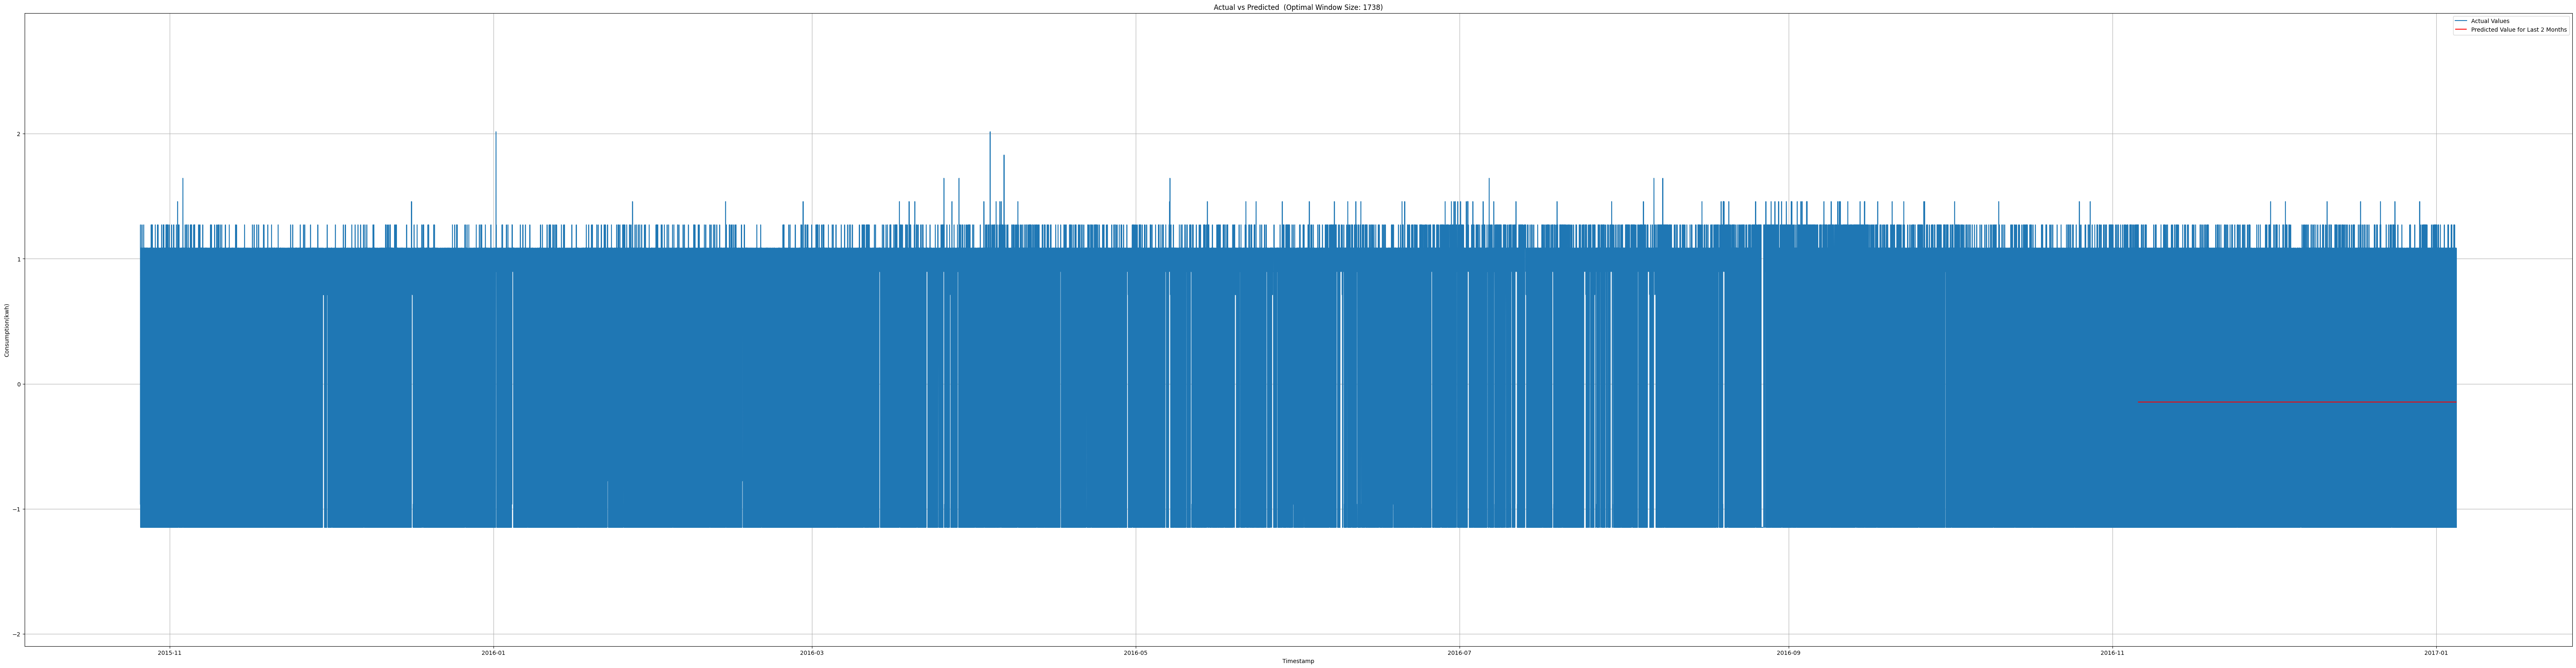

In [58]:
# Assuming 'data6' is the DataFrame we are working with
# Calculate the moving average using the optimal window size
optimal_ma_prediction = df2.loc[:two_months_ago, 'daily_DE_KN_residential3_refrigerator'].rolling(window=optimal_window_size, min_periods=1).mean().iloc[-1]

# Determine the range for 'log_meter_reading' in data6
reading_min = df2['daily_DE_KN_residential3_refrigerator'].min()
reading_max = df2['daily_DE_KN_residential3_refrigerator'].max()
padding = (reading_max - reading_min) * 0.3  # 10% padding on each side

# Plotting
plt.figure(figsize=(80, 20))

# Plot the actual values for the entire period from data6
plt.plot(df2.index, df2['daily_DE_KN_residential3_refrigerator'], label='Actual Values')

# Plot the predicted value line only for the last two months
plt.hlines(y=optimal_ma_prediction, xmin=last_two_months.index[0], xmax=last_two_months.index[-1], colors='r', linestyles='solid', label='Predicted Value for Last 2 Months')

plt.title(f'Actual vs Predicted  (Optimal Window Size: {optimal_window_size})')
plt.xlabel('Timestamp')
plt.ylabel('Consumption(kwh)')

# Set the y-axis limits
plt.ylim(reading_min - padding, reading_max + padding)

plt.legend()
plt.grid(True)
plt.show()